## 保存した1stCNNモデルを呼び出して、画像の識別を行ってみる。

#### 結果は混合行列の形として、さらに適合率、再現率、F1値をみてみる。
##### 正解率（accuracy）
##### 適合率（precision, PPV）
##### 再現率（recall, sensitivity, hit rate, TPR）
##### F値（F-measure, F-score, F1-score ）

In [1]:
from tensorflow.keras import datasets, layers, models
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR) 
tf.autograph.set_verbosity(0)

model=models.load_model('1stCNN_WIG_64_64.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         7

In [2]:
### generator of training data from WIG database
import pandas as pd
import h5py
import os
from mygens import *
        
hdf_path="WIG_v1.2.1_900.h5"
path_list=[]
label_list=[]

def GetOnlyDataset(name, obj):
    if isinstance(obj, h5py.Dataset):
        path_list.append(name)
        lbl= name.split('/')
        label=os.path.join(lbl[0],lbl[1],lbl[2])
        label_list.append(lbl[2])

with h5py.File(hdf_path,'r') as f:  
    f.visititems(GetOnlyDataset)

label_num_list, out= pd.factorize(label_list)
label_num_list.max()

f=h5py.File(hdf_path,'r') 
valset=ImageDataGenerator()
valgen=valset.flow_from_directory(f,path_list,label_num_list,60) #60種のデータをテストする

#### 混合行列による図示

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-07-31 16:41:26.280031: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-31 16:41:26.280163: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


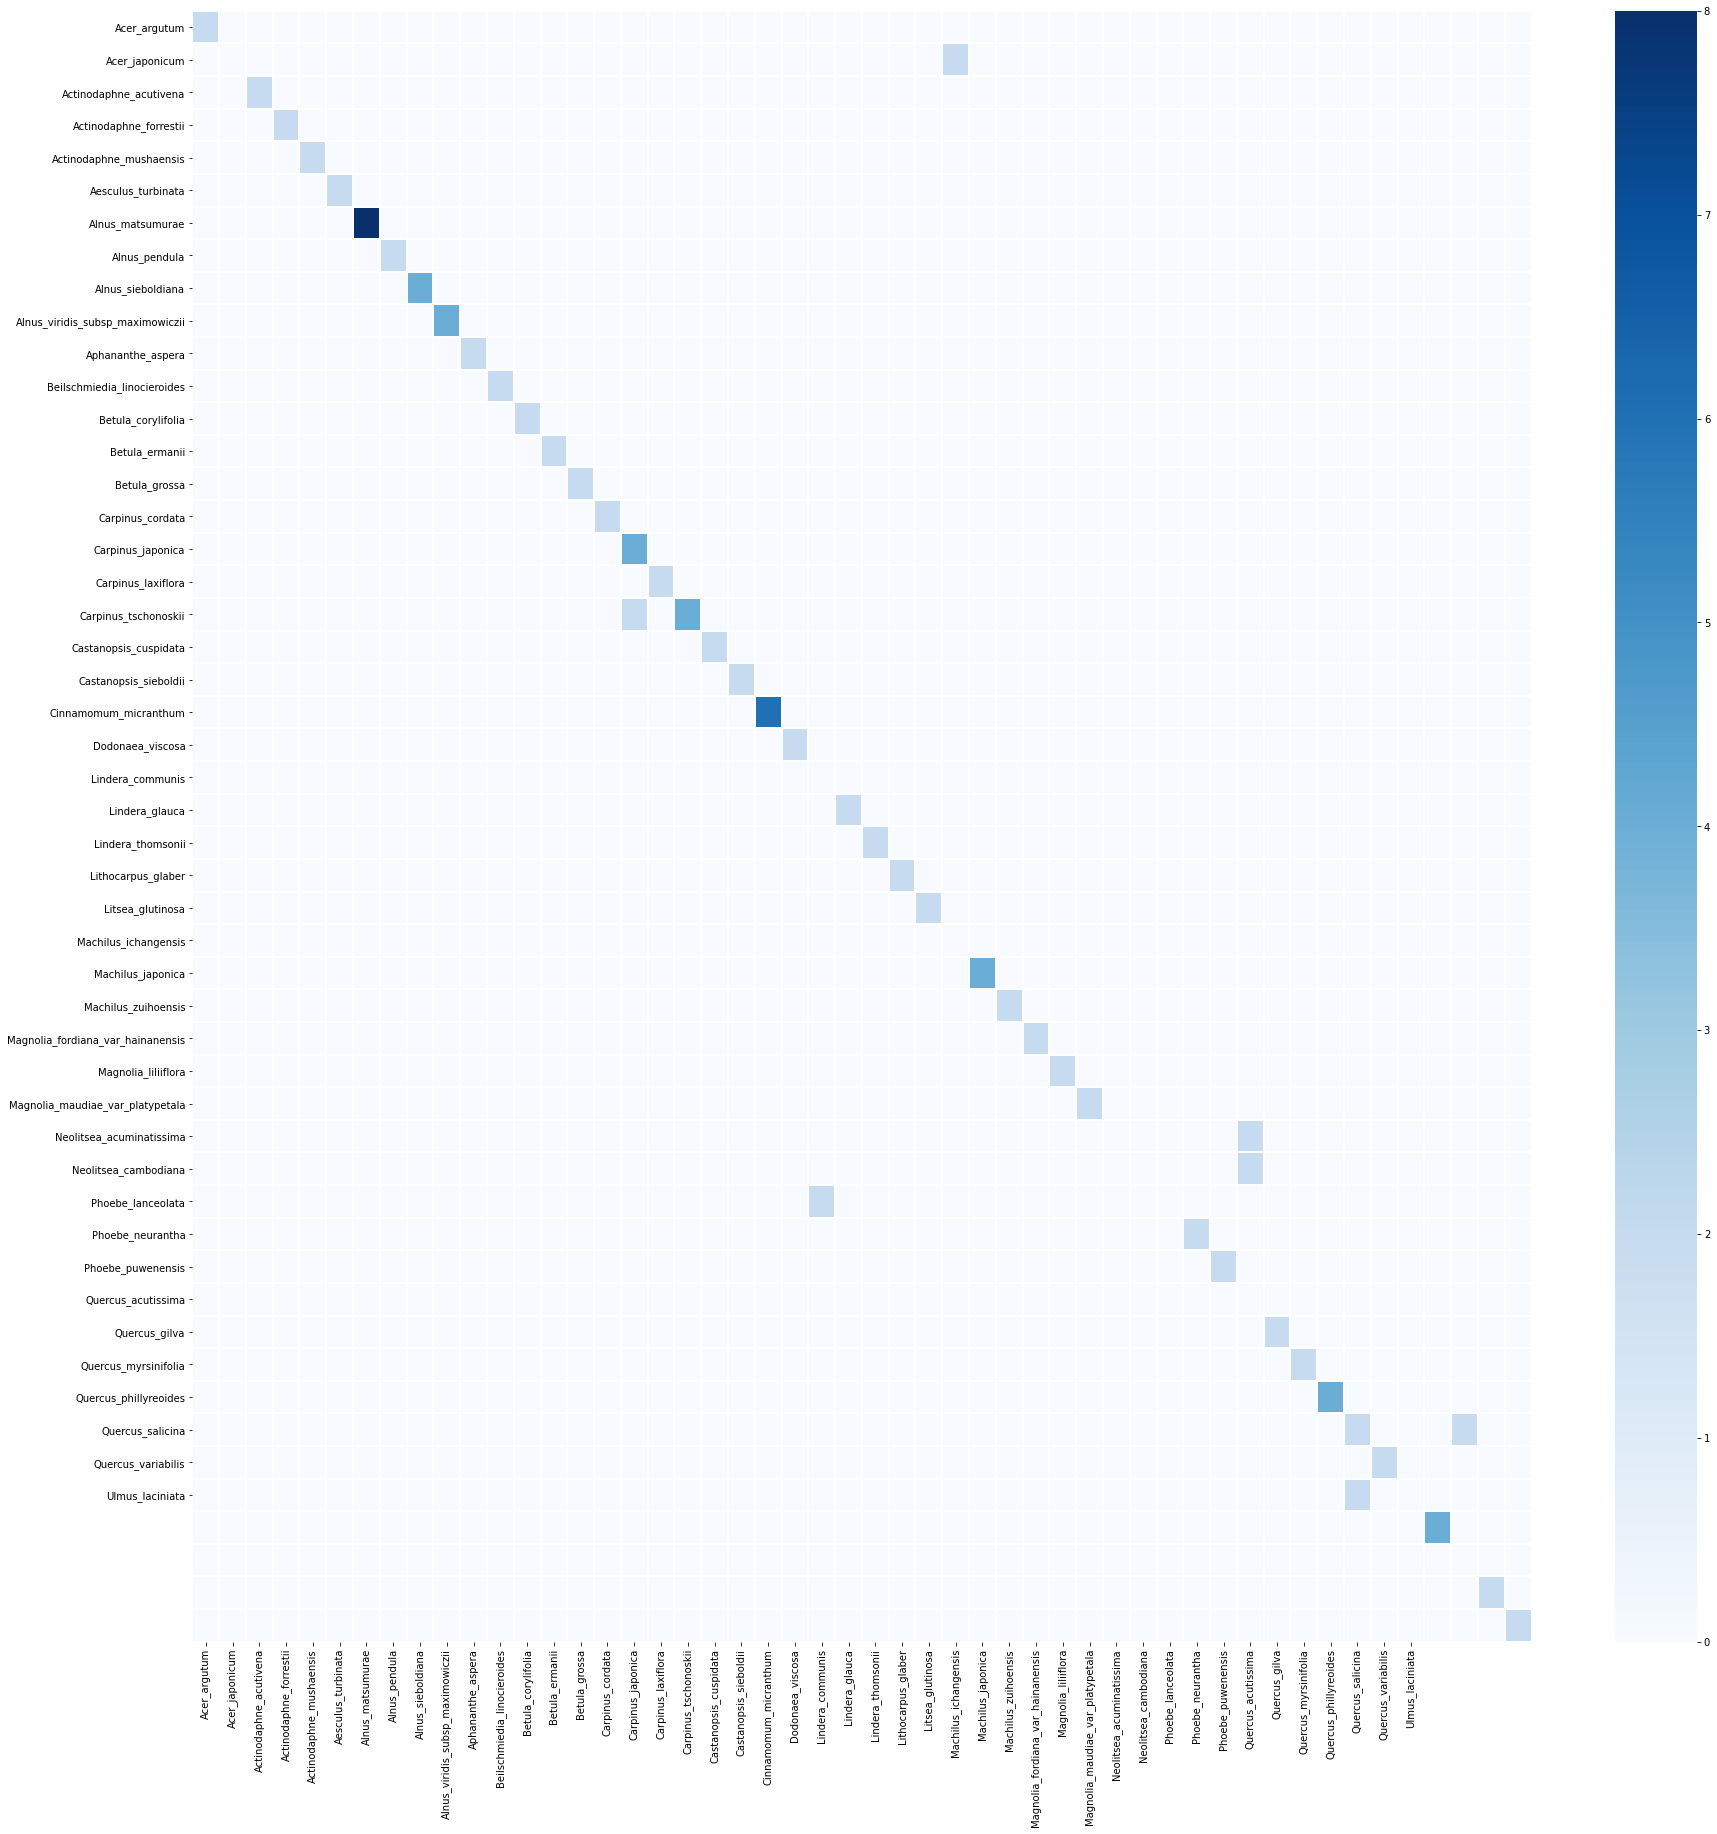

In [3]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cm=np.zeros((119,119))
for i in range(150):
    x,y=valgen.__next__()
    yhat_classes = np.argmax(model.predict(x, verbose=0),axis=-1) # predictは確率を計算するのでargmaxでを数値ラベルに変換）
    Y=np.argmax(y, axis=-1) # categorical を数値ラベルに変換
    cm=confusion_matrix(Y,yhat_classes)
    cm += cm

labels=[np.unique(label_list)[num] for num in sorted(np.unique(Y).tolist())]

fig = plt.subplots(figsize=(30,30))
sns.heatmap(cm, xticklabels=labels, yticklabels=labels, annot=False,linewidths=.1,cmap="Blues")
plt.show()

### 適合率、再現率、F1値

In [4]:
from sklearn.metrics import classification_report
d = classification_report(Y,yhat_classes, output_dict=True)
df = pd.DataFrame(d)
df = df.T

/Users/js/miniforge3/envs/python38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/js/miniforge3/envs/python38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/js/miniforge3/envs/python38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Us

### End of script